# Import packeges

In [1]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
clean_df, data = read_data('../../datasets/yt_subscribers.csv', debug=True)

         Date  Subscribers  Unnamed: 2  Unnamed: 3  Unnamed: 4
0   8/26/2024           40         NaN         NaN         NaN
1  10/13/2024           39         NaN         NaN         NaN
2   3/28/2024           38         NaN         NaN         NaN
3   8/25/2024           38         NaN         NaN         NaN
4   7/18/2024           37         NaN         NaN         NaN
5   9/16/2024           36         NaN         NaN         NaN
6   8/10/2024           34         NaN         NaN         NaN
7   7/26/2024           33         NaN         NaN         NaN
8    9/1/2024           33         NaN         NaN         NaN
9   11/4/2024           33         NaN         NaN         NaN
----------------------------------------------------
          Date  Subscribers
254 2023-11-15           13
336 2023-11-16            8
349 2023-11-17            6
301 2023-11-18           10
215 2023-11-19           15
180 2023-11-20           17
361 2023-11-21            3
337 2023-11-22            8
35

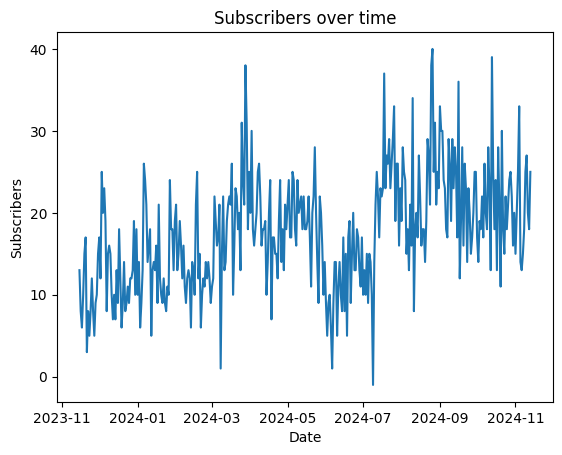

In [3]:
plot_data(clean_df["Subscribers"], title="Subscribers over time", x_label="Date", y_label="Subscribers")

In [4]:
def prepare_train_test_data(data, time_step_in, time_step_out, test_size=0.2):
    X, Y = create_dataset(data, time_step_in, time_step_out)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

    # Separate scalers for X and Y
    scaler_X = MinMaxScaler(feature_range=(0,1))
    scaler_Y = MinMaxScaler(feature_range=(0,1))
    x_train = scaler_X.fit_transform(X_train)
    y_train = scaler_Y.fit_transform(Y_train)
    x_test = scaler_X.transform(X_test)
    y_test = scaler_Y.transform(Y_test)

    print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')
    
    return x_train, x_test, y_train, y_test, scaler_X, scaler_Y
x_train, x_test, y_train, y_test, scaler_X, scaler_Y = prepare_train_test_data(data, time_step_in=30, time_step_out=7, test_size=0.2)

x_train shape: (262, 30), y_train shape: (262, 7), x_test shape: (66, 30), y_test shape: (66, 7)


In [5]:
model=Sequential()
model.add(Dense(256,input_shape=(30,),activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(7))
model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,399 (200.78 KB)

 Trainable params: 51,399 (200.78 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history=model.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    verbose=1

)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3835 - mean_absolute_error: 0.3835 - val_loss: 0.1601 - val_mean_absolute_error: 0.1601
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1597 - mean_absolute_error: 0.1597 - val_loss: 0.1364 - val_mean_absolute_error: 0.1364
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - val_loss: 0.1402 - val_mean_absolute_error: 0.1402
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1296 - mean_absolute_error: 0.1296 - val_loss: 0.1268 - val_mean_absolute_error: 0.1268
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - val_loss: 0.1250 - val_mean_absolute_error: 0.1250
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - val_loss: 0.1225 - val_mean_absolute_error: 0.1225
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - val_loss: 0.1259 - va

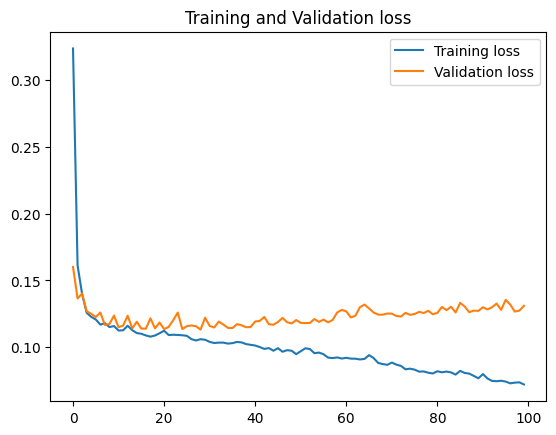

In [7]:
history_plot(history)

In [8]:
train_predicted = model.predict(x_train)
test_predicted = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [9]:
# calculate MAE
mae_error_train= mae(y_train,train_predicted)
mae_error_test= mae(y_test,test_predicted)
print(f"MAE Train data  : {mae_error_train} ")
print(f"MAE  Test data : {mae_error_test} ")

MAE Train data  : 0.06830104668285188 
MAE  Test data : 0.13091897635678051 


In [10]:
all_predictions = []
input_window = x_test[-1]  

for i in range(1, 6): 
    print(f'Step {i} ==> Input Window: {input_window}')
    
    y_temp = model.predict(input_window.reshape(1, -1))
    print(f"Prediction Output (y_temp): {y_temp}")
    all_predictions.extend(y_temp[0])  # Add all predicted values from y_temp to the list
    input_window = np.roll(input_window, -1, axis=0)
    input_window[-1] = y_temp[0][0] 

Step 1 ==> Input Window: [0.56410256 0.51282051 0.2195122  0.3902439  0.41463415 0.3902439
 0.26829268 0.19512195 0.26829268 0.15384615 0.35       0.20512821
 0.43589744 0.28947368 0.17073171 0.24390244 0.36585366 0.17948718
 0.20512821 0.3        0.24390244 0.28205128 0.28205128 0.34146341
 0.48780488 0.26829268 0.43589744 0.26829268 0.36585366 0.17073171]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction Output (y_temp): [[0.28795013 0.34269145 0.45007095 0.2758432  0.4057982  0.32378995
  0.25245324]]
Step 2 ==> Input Window: [0.51282051 0.2195122  0.3902439  0.41463415 0.3902439  0.26829268
 0.19512195 0.26829268 0.15384615 0.35       0.20512821 0.43589744
 0.28947368 0.17073171 0.24390244 0.36585366 0.17948718 0.20512821
 0.3        0.24390244 0.28205128 0.28205128 0.34146341 0.48780488
 0.26829268 0.43589744 0.26829268 0.36585366 0.17073171 0.28795013]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Output (y_temp): [[0.33191487 0.5228441  0.4561809  0.43936038 0.41740158 0.32262

In [11]:
all_predictions=np.array(all_predictions)

In [12]:
num_samples = len(all_predictions) // 7
all_predictions_reshaped = all_predictions.reshape(num_samples, 7)
y_next_30 = scaler_Y.inverse_transform(all_predictions_reshaped)
y_next_30=np.round(y_next_30)
print(y_next_30)

[[11. 13. 17. 10. 15. 14.  9.]
 [13. 20. 18. 17. 16. 14. 13.]
 [17. 11. 19. 13. 14. 16. 12.]
 [13. 14. 12. 11. 10. 12. 11.]
 [14. 10. 11. 13. 12. 12. 13.]]


In [13]:
x_test=scaler_X.inverse_transform(x_test)
x_train=scaler_X.inverse_transform(x_train)

In [14]:
x_test[-1]

array([23., 19.,  8., 15., 16., 15., 10.,  7., 10.,  7., 13.,  9., 18.,
       12.,  6.,  9., 14.,  8.,  9., 11.,  9., 12., 12., 13., 19., 10.,
       18., 10., 14.,  6.])

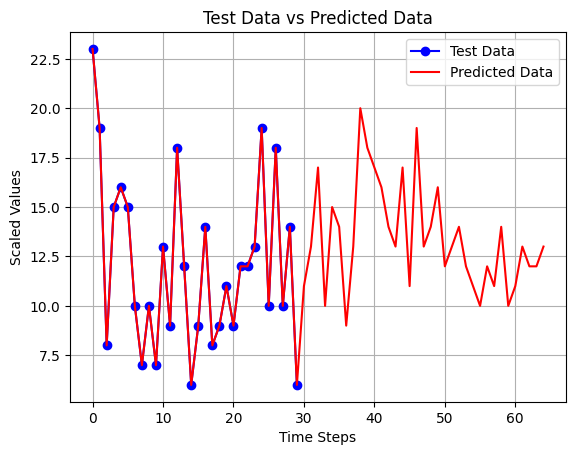

In [15]:
plt.plot(x_test[-1], label='Test Data', color='blue', marker='o')
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red')
plt.title('Test Data vs Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
last_date = clean_df.index[-1]
total_sub = np.sum(np.array(clean_df['Subscribers']))
total_next_30 = np.sum(y_next_30)
print(f"Total subscribers till {last_date}: {total_sub}, next_30_days: {np.round(total_next_30)} => final after 30 days: {total_sub + round(total_next_30)}")

Total subscribers till 2024-11-13 00:00:00: 6383, next_7_days: 470.0 => final after 7 days: 6853
